**Práctica Regresión Lineal**

Usando lo visto en la sesión de regresión lineal (*actividad 8*), busque en línea un dataset de interés y aplique lo aprendido. El entregable será:

1. El dataset.
2. Programa en Python con la aplicación de la regresión lineal.
3. Reporte con hallazgos y conclusiones.

In [3]:
#Cargar el dataset
import pandas as pd

dataset = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\9. Noveno Semestre\\Máquinas de aprendizaje\\Actividades\\19 Airfares.csv')

print(dataset.head())

  S_CODE                  S_CITY E_CODE                  E_CITY  COUPON  NEW  \
0      *  Dallas/Fort Worth   TX      *  Amarillo            TX    1.00    3   
1      *  Atlanta             GA      *  Baltimore/Wash Intl MD    1.06    3   
2      *  Boston              MA      *  Baltimore/Wash Intl MD    1.06    3   
3    ORD  Chicago             IL      *  Baltimore/Wash Intl MD    1.06    3   
4    MDW  Chicago             IL      *  Baltimore/Wash Intl MD    1.06    3   

  VACATION   SW       HI  S_INCOME  E_INCOME    S_POP    E_POP        SLOT  \
0       No  Yes  5291.99   28637.0   21112.0  3036732   205711        Free   
1       No   No  5419.16   26993.0   29838.0  3532657  7145897        Free   
2       No   No  9185.28   30124.0   29838.0  5787293  7145897        Free   
3       No  Yes  2657.35   29260.0   29838.0  7830332  7145897  Controlled   
4       No  Yes  2657.35   29260.0   29838.0  7830332  7145897        Free   

   GATE  DISTANCE    PAX    FARE  
0  Free       3

In [5]:
print(dataset.E_INCOME) 

0      21112.0
1      29838.0
2      29838.0
3      29838.0
4      29838.0
        ...   
633    37375.0
634    37375.0
635    37375.0
636    37375.0
637    37375.0
Name: E_INCOME, Length: 638, dtype: float64


In [7]:
print(dataset.FARE) 

0       64.11
1      174.47
2      207.76
3       85.47
4       85.47
        ...  
633    129.63
634    129.63
635    124.87
636    129.62
637    129.62
Name: FARE, Length: 638, dtype: float64


In [11]:
#Cargar los datos en un dataframe

df = pd.DataFrame(dataset) 
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


**Limpieza de datos**

In [12]:
#comprobar el tipo de dato de cada campo

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


In [13]:
#COMPROBAR SI HAY DATOS FALTANTES (NAs)
print(df.isnull().sum()) 

S_CODE      0
S_CITY      0
E_CODE      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
HI          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64


**Análisis de características**

In [16]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=['number'])

print(df_numericas)

     COUPON  NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
0      1.00    3  5291.99   28637.0   21112.0  3036732   205711       312   
1      1.06    3  5419.16   26993.0   29838.0  3532657  7145897       576   
2      1.06    3  9185.28   30124.0   29838.0  5787293  7145897       364   
3      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
4      1.06    3  2657.35   29260.0   29838.0  7830332  7145897       612   
..      ...  ...      ...       ...       ...      ...      ...       ...   
633    1.08    3  2216.70   32991.0   37375.0  8621121   991717      1030   
634    1.08    0  2216.70   32991.0   37375.0  8621121   991717      1030   
635    1.17    3  6797.80   27994.0   37375.0  4948339   991717       960   
636    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   
637    1.28    3  5566.43   31981.0   37375.0  4549784   991717       858   

       PAX    FARE  
0     7864   64.11  
1     8820  174.47  
2     6452  

In [17]:
#CALCULAR LA CORRELACIÓN POR PARES DE COLUMNAS

corr = df_numericas.corr() 
print(corr)

            COUPON       NEW        HI  S_INCOME  E_INCOME     S_POP  \
COUPON    1.000000  0.020223 -0.347252 -0.088403  0.046889 -0.107763   
NEW       0.020223  1.000000  0.054147  0.026597  0.113377 -0.016672   
HI       -0.347252  0.054147  1.000000 -0.027382  0.082393 -0.172495   
S_INCOME -0.088403  0.026597 -0.027382  1.000000 -0.138864  0.517187   
E_INCOME  0.046889  0.113377  0.082393 -0.138864  1.000000 -0.144059   
S_POP    -0.107763 -0.016672 -0.172495  0.517187 -0.144059  1.000000   
E_POP     0.094970  0.058568 -0.062456 -0.272280  0.458418 -0.280143   
DISTANCE  0.746805  0.080965 -0.312375  0.028153  0.176531  0.018437   
PAX      -0.336974  0.010495 -0.168961  0.138197  0.259961  0.284611   
FARE      0.496537  0.091730  0.025195  0.209135  0.326092  0.145097   

             E_POP  DISTANCE       PAX      FARE  
COUPON    0.094970  0.746805 -0.336974  0.496537  
NEW       0.058568  0.080965  0.010495  0.091730  
HI       -0.062456 -0.312375 -0.168961  0.025195  
S_I

Hay pares de variables con una alta correlación, observe:
    
    - COUPON x DISTANCE
    - COUPON x FARE
    - E_POP x E_INCOME
    - FARE x E_INCOME
    - S_INCOME x S_POP
    - DISTANCE x FARE

In [19]:
#---get the top 3 features that has the highest correlation--- 
print(df_numericas.corr().abs().nlargest(3, 'FARE').index) 

#---print the top 3 correlation values--- 
print(df_numericas.corr().abs().nlargest(3, 'FARE').values[:,8]) 

Index(['FARE', 'DISTANCE', 'COUPON'], dtype='object')
[0.09070541 0.1024816  0.33697358]


Al parecer la distancia y los cupones son los factores clave sobre el precio de las tarifas. Usaremos esas variables para nuestro modelo.

**Regresión múltiple**

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'FARE')

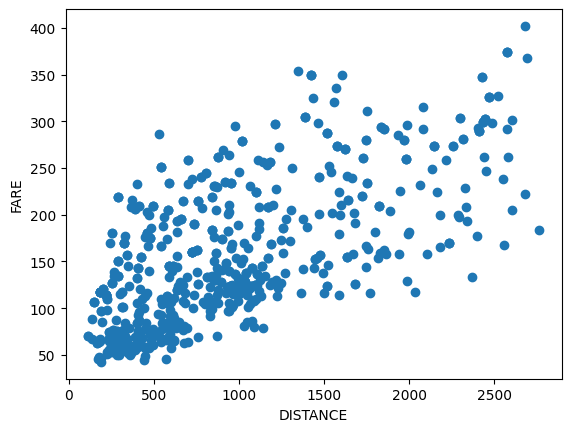

In [22]:
#DIAGRAMA DE DISPERSIÓN 

plt.scatter(df['DISTANCE'], df['FARE'], marker='o') 
plt.xlabel('DISTANCE') 
plt.ylabel('FARE') 

Text(0, 0.5, 'FARE')

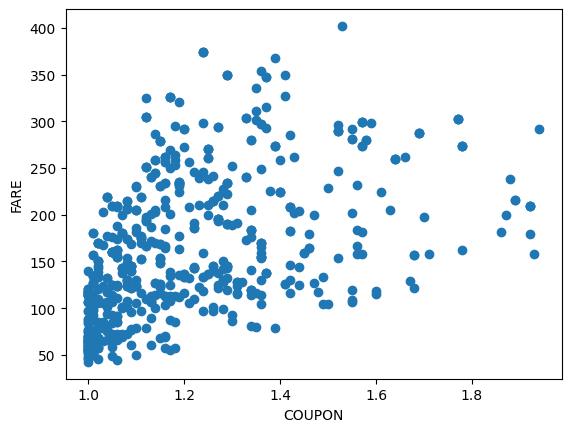

In [24]:
#DIAGRAMA DE DISPERSIÓN 

plt.scatter(df['COUPON'], df['FARE'], marker='o') 
plt.xlabel('COUPON') 
plt.ylabel('FARE')

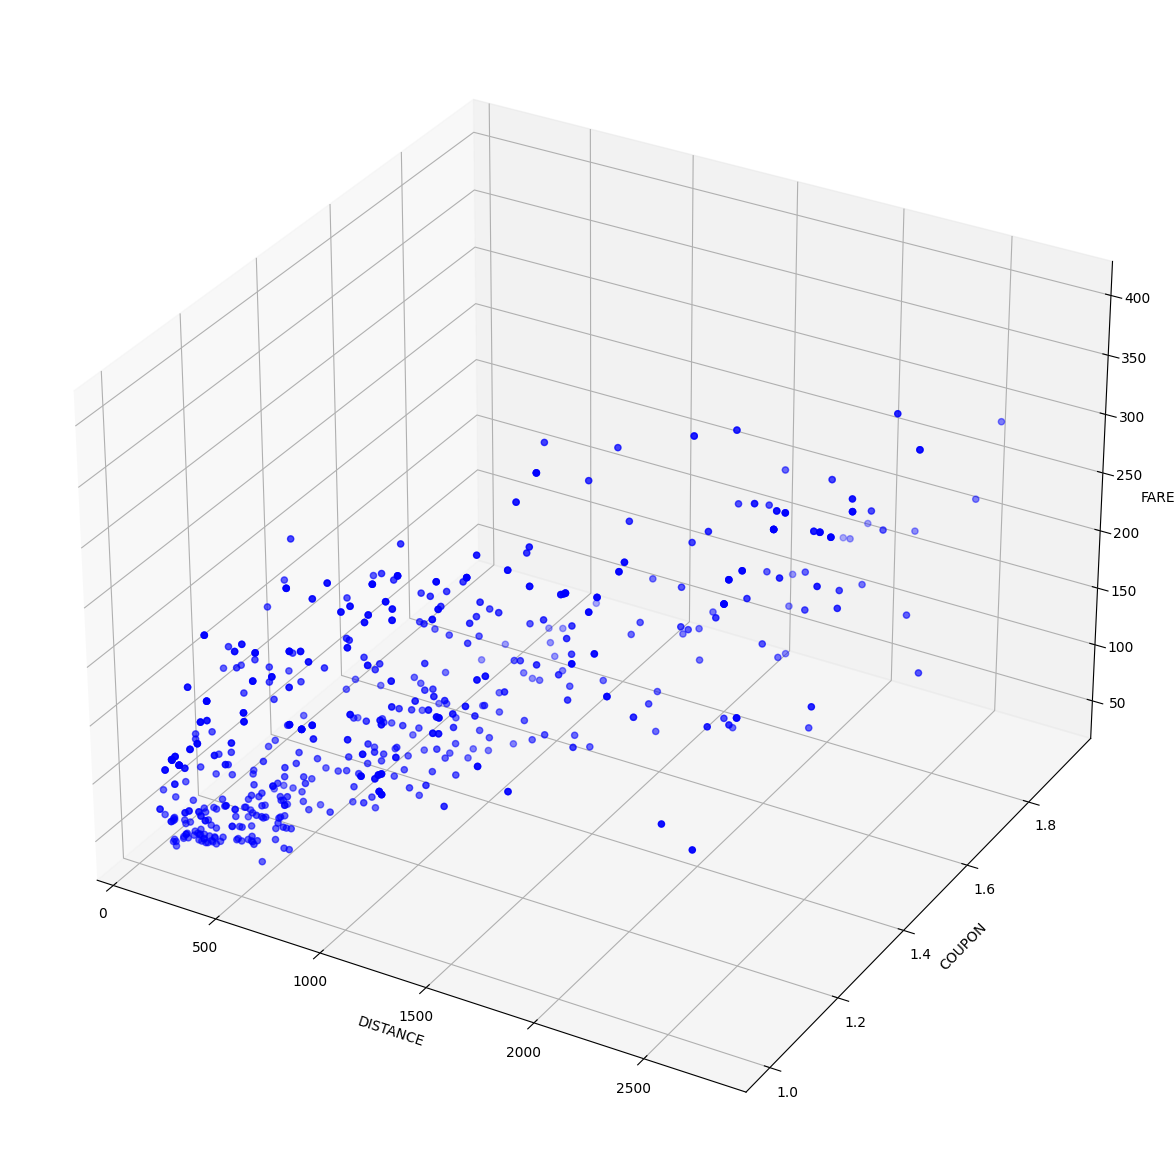

In [25]:
#En 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df['DISTANCE'], 
df['COUPON'],
df['FARE'], 
c='b') 
ax.set_xlabel("DISTANCE") 
ax.set_ylabel("COUPON") 
ax.set_zlabel("FARE") 
plt.show() 

**Entrenamiento del modelo**

Creamos dos DataFrames: X e Y. 

    - X: contendrá la combinación de las características DISTANCE y COUPON, mientras que el DataFrame.
    - Y: contendrá la etiqueta FARE.

In [31]:
import numpy as np 

x = pd.DataFrame(np.c_[df['DISTANCE'], df['COUPON']], columns = ['DISTANCE','COUPON']) 
Y = df['FARE'] 

from sklearn.model_selection import train_test_split 
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5) #Partición 70:30

print(x_train.shape) 
print(Y_train.shape)

(446, 2)
(446,)


In [30]:
print(x_test.shape) 
print(Y_test.shape)

(192, 2)
(192,)


In [32]:
#Comenzar con el entrenamiento
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(x_train, Y_train)

LinearRegression()

In [33]:
#Usar el conjunto de pruebas para hacer unas predicciones

price_pred = model.predict(x_test) 

In [34]:
print(price_pred)

[114.86419593 221.73671594 284.89289678 273.9376114  163.48116326
 108.91322532 151.20124739 132.98290746 162.92053652 157.7669031
 160.32914418 165.40387411 119.38660149 117.05688868 211.61640733
 106.55442324 110.26288688 278.06562353 276.57875596 198.9046444
 164.90136394 106.62502435 261.98579401 133.94629199 133.24040481
 111.91155763 164.60659891 107.18565109 156.93217427 126.12248672
 125.89819883 265.02157995 107.78778967 182.79172938 168.35239222
 140.35832291 162.43463108 127.18974382 168.26100419 214.5981349
 221.58733531 113.81354356 151.89471201 162.92053652 162.96623053
 152.60078514 169.86822509 108.21139635 151.04344043 146.96530449
 240.7648776   94.15827423 115.15490275 221.98185272 226.91113627
 141.58332498 105.59927909 106.23880931 118.81767238 103.31938048
 146.90312972 136.43805592 129.50703407 287.11867504 253.07806492
 140.35832291 129.27444381 277.33046112 125.89819883  96.99879958
 120.84007363 105.8442919  182.80833412 166.40889445 166.89049374
 131.87819673

In [35]:
#Conocer el rendimiento del modelo usando el método R-cuadrado
print('R-Squared: %.4f' % model.score(x_test, Y_test))

R-Squared: 0.4834


2933.621770975066


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

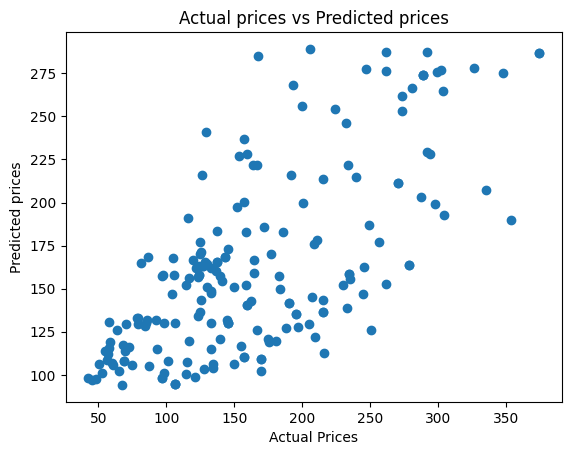

In [36]:
#diagrama de dispersión que muestra el precio real frente al precio previsto
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(Y_test, price_pred) 
print(mse) 
plt.scatter(Y_test, price_pred) 
plt.xlabel("Actual Prices") 
plt.ylabel("Predicted prices") 
plt.title("Actual prices vs Predicted prices")

**Obtención del punto de corte y los coeficientes**

In [37]:
print(model.intercept_) 
print(model.coef_) 

82.4393570169702
[0.07890348 0.83023673]


In [40]:
print(df_numericas.COUPON)
print(df_numericas.DISTANCE)
print(df_numericas.FARE)

0      1.00
1      1.06
2      1.06
3      1.06
4      1.06
       ... 
633    1.08
634    1.08
635    1.17
636    1.28
637    1.28
Name: COUPON, Length: 638, dtype: float64
0       312
1       576
2       364
3       612
4       612
       ... 
633    1030
634    1030
635     960
636     858
637     858
Name: DISTANCE, Length: 638, dtype: int64
0       64.11
1      174.47
2      207.76
3       85.47
4       85.47
        ...  
633    129.63
634    129.63
635    124.87
636    129.62
637    129.62
Name: FARE, Length: 638, dtype: float64


In [42]:
#usar el modelo para predecir el precio de la vivienda cuando DISTANCE es 1030 y COUPON es 1.08 
print(model.predict([[1030, 1.08]])) 

[164.60659891]


C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
164.60659891 - 129.63

34.97659891000001

Como se puede observar, la predicción tiene un intervalo de confianza un poco grande ya que en la fila 633 y 634 del DF se pueden analizar dos observaciones en las que el precio fue de 129.63 cuando la distancia y el cupón fueron de 1030 km y 1.08%. En cambio, nuestro modelo predijo que dada una distancia de 1030 km y un cupón de 1.08 el precio sería de **164.6**. Como vemos, la diferencia de precio fue de 34.97, lo que significaría un margen de diferencia considerable si hablamos de dólares.

**Ajustes al modelo**

Mi hipótesis es que el split de datos no fue adecuado ya que sólo contamos con 2 observaciones (o ninguna) para el conjunto de pruebas, así que repetiré el proceso pero con un split de 60:40 y veré si ese era el problema.
También está la opción de probar con un split de 90:10, en prinicpio sería más adecuado debido al dataset reducido que tenemos, sin embargo, no lo haré ya que si con 80:20 me dejó sin observaciones para el conjunto de pruebas no me imagino si uso un split de 90:10.

In [51]:
import numpy as np 

x = pd.DataFrame(np.c_[df['DISTANCE'], df['COUPON']], columns = ['DISTANCE','COUPON']) 
Y = df['FARE'] 

from sklearn.model_selection import train_test_split 
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.4, random_state=5) #Partición 60:40

print(x_train.shape) 
print(Y_train.shape)

(382, 2)
(382,)


In [46]:
print(x_test.shape) 
print(Y_test.shape)

(256, 2)
(256,)


In [47]:
#Comenzar con el entrenamiento
from sklearn.linear_model import LinearRegression 

model2 = LinearRegression() 
model2.fit(x_train, Y_train)

LinearRegression()

In [48]:
#Usar el conjunto de pruebas para hacer unas predicciones

price_pred = model2.predict(x_test) 

In [49]:
#Conocer el rendimiento del modelo usando el método R-cuadrado
print('R-Squared: %.4f' % model2.score(x_test, Y_test))

R-Squared: 0.4452


In [50]:
#usar el modelo para predecir el precio de la vivienda cuando DISTANCE es 1030 y COUPON es 1.08 
print(model2.predict([[1030, 1.08]]))

[164.09300418]


C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Bueno, eso me cortó la inspiración, esperaba un mejor resultado, no una mejora de apenas unas décimas. Creo que podría dejarlo como evidencia de que mi hipótesis es válida pero ya me piqué, así que voy a probar con un split de 90:10 (aunque hay que recordar el riesgo de sobreajuste que implica este split).

In [52]:
import numpy as np 

x = pd.DataFrame(np.c_[df['DISTANCE'], df['COUPON']], columns = ['DISTANCE','COUPON']) 
Y = df['FARE'] 

from sklearn.model_selection import train_test_split 
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.1, random_state=5) #Partición 90:10

print(x_train.shape) 
print(Y_train.shape)

(574, 2)
(574,)


In [53]:
print(x_test.shape) 
print(Y_test.shape)

(64, 2)
(64,)


In [54]:
#Comenzar con el entrenamiento
from sklearn.linear_model import LinearRegression 

model3 = LinearRegression() 
model3.fit(x_train, Y_train)

LinearRegression()

In [55]:
#Usar el conjunto de pruebas para hacer unas predicciones

price_pred = model3.predict(x_test) 

In [56]:
#Conocer el rendimiento del modelo usando el método R-cuadrado
print('R-Squared: %.4f' % model3.score(x_test, Y_test))

R-Squared: 0.4241


In [57]:
#usar el modelo para predecir el precio de la vivienda cuando DISTANCE es 1030 y COUPON es 1.08 
print(model3.predict([[1030, 1.08]]))

[166.63359622]


C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Aunque insatisfactorio, me agrada este resultado. Me agrada porque de cierta forma corrobora el hecho de que el sobreajuste merma la capacidad de predicción. Por lo tanto, podemos concluir que el modelo que mejor se aproxima a nuestros resultados es el modelo 1, pero ¿por qué el modelo 1 es el mejor pese a que el modelo 2 predijo ligeramente mejor el precio de la tarifa?, porque tuvo un mejor rendimiento en la prueba de R-cuadrada. 
Recordemos que  el R cuadrado mide la proporción de la variación en la variable dependiente que puede ser explicada por las variables independientes en un modelo de regresión. Se expresa como un número que varía entre 0 y 1, donde **un valor de 1 significa que todos los datos se explican completamente por el modelo**, mientras que un valor de 0 indica que no hay explicación adicional. Por lo tanto, **un R-cuadrado más alto se traduce en un mejor rendimiento**.

In [59]:
#Comparación de R-cuadrados

print('R-Squared: %.4f' % model.score(x_test, Y_test))
print('R-Squared: %.4f' % model2.score(x_test, Y_test))
print('R-Squared: %.4f' % model3.score(x_test, Y_test))

R-Squared: 0.4284
R-Squared: 0.4256
R-Squared: 0.4241


**Plot final**

Dicho lo dicho, veamos cómo se ve nuestro gráfico final para el modelo 1.

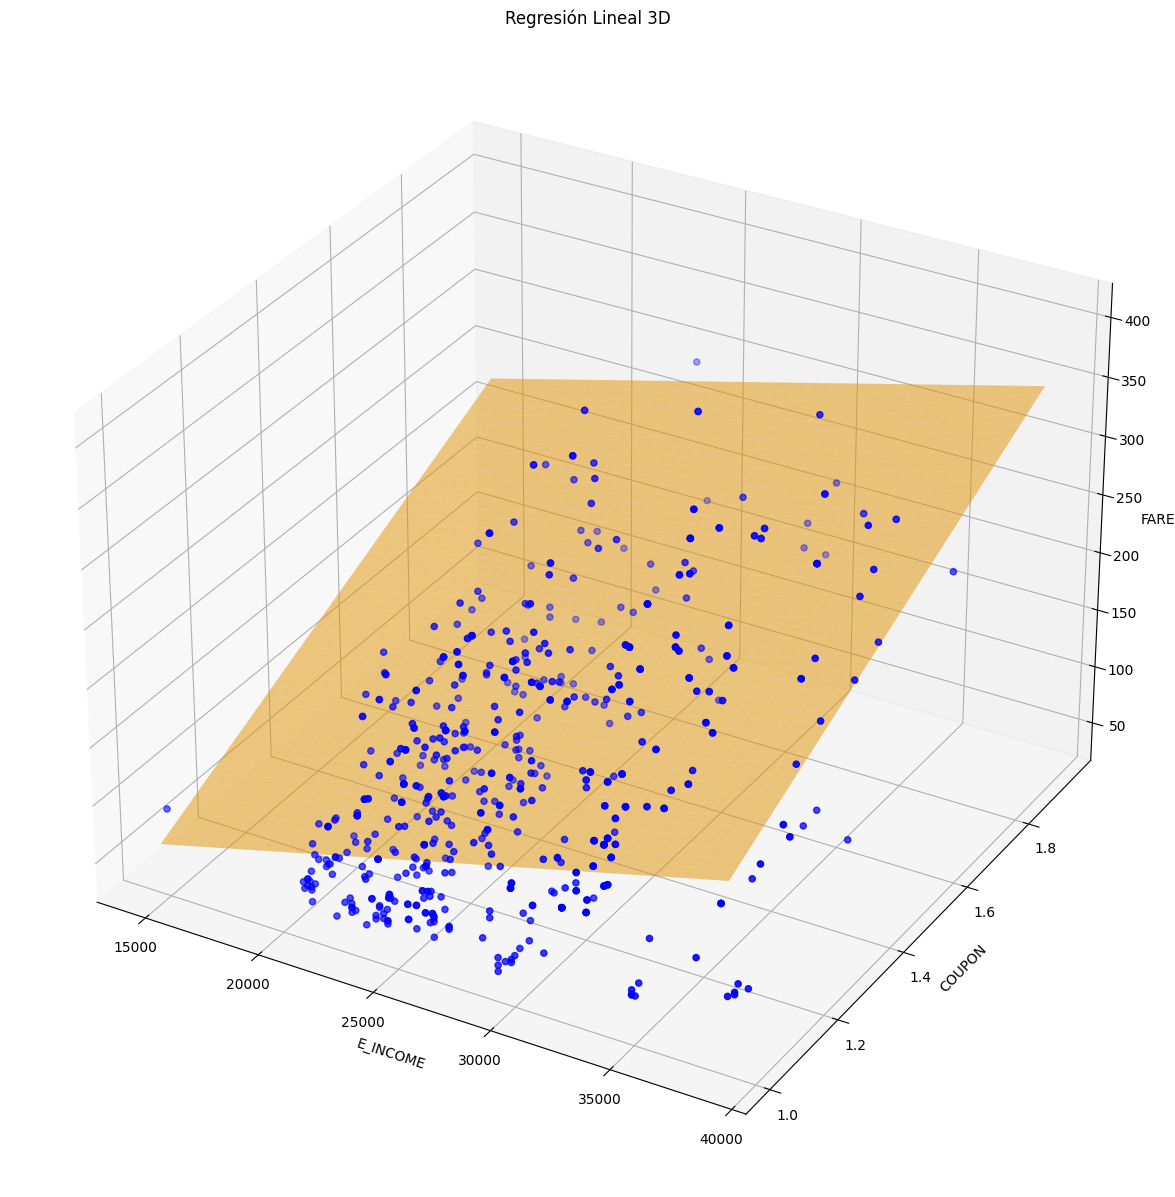

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv("C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\9. Noveno Semestre\\Máquinas de aprendizaje\\Actividades\\19 Airfares.csv")

# Seleccionamos las variables predictoras y la variable respuesta
x = pd.DataFrame(np.c_[df['E_INCOME'], df['COUPON']], columns=['E_INCOME', 'COUPON'])
Y = df['FARE']

# Creamos el modelo de regresión
model = LinearRegression()
model.fit(x, Y)

# Visualizamos los datos y el hiperplano
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['E_INCOME'], x['COUPON'], Y, c='blue', label='Datos reales')

ax.set_xlabel("E_INCOME")
ax.set_ylabel("COUPON")
ax.set_zlabel("FARE")
ax.set_title("Regresión Lineal 3D")

# Crear malla para la superficie
x_surf = np.linspace(x['E_INCOME'].min(), x['E_INCOME'].max(), 50)
y_surf = np.linspace(x['COUPON'].min(), x['COUPON'].max(), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Calcular predicciones Z sobre la malla
z = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Dibujar la superficie
ax.plot_surface(x_surf, y_surf, z, color='orange', alpha=0.5, label='Modelo')

plt.show()
